In [113]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated_split.pkl")
df_train_aggregated= pd.read_pickle(file_path)

df_train_aggregated


,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
0,1,Normal,100,100,100,100,No,No,No,No,...,784.906580,0.017144,5.013518,5020.028779,65.000000,26930.154869,501.116403,11.633031,1,1
1,1,Normal,100,100,100,100,No,No,No,No,...,787.373792,-0.002641,5.016796,5610.686996,65.000000,26048.487157,508.501184,11.441019,1,2
2,1,Normal,100,100,100,100,No,No,No,No,...,789.525599,-0.003006,5.017115,5325.708422,64.837905,26122.284330,501.853078,11.428535,1,3
3,1,Normal,100,100,100,100,No,No,No,No,...,785.214600,-0.002262,4.994830,5071.356039,65.000000,27028.792007,505.424186,11.654316,2,1
4,1,Normal,100,100,100,100,No,No,No,No,...,787.175441,-0.003732,4.999298,5609.065086,65.000000,26860.719421,520.657365,11.618024,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,3,Anomaly,100,100,100,100,No,No,No,No,...,788.615572,0.266961,4.746968,5627.621157,60.000000,27846.049411,497.483160,11.829197,176,2
527,3,Anomaly,100,100,100,100,No,No,No,No,...,790.625595,0.267047,4.747359,5802.848670,59.850374,27917.903116,501.884458,11.814801,176,3
528,3,Anomaly,100,100,100,100,No,No,No,No,...,783.706148,0.008564,5.130090,3916.468924,65.000000,28643.386501,414.984117,11.997359,177,1
529,3,Anomaly,100,100,100,100,No,No,No,No,...,785.382561,-0.003840,5.136178,4246.767660,65.000000,28181.779625,418.906796,11.900293,177,2


Filtriamo i dati di training per casi Fault (Solenoid Fault)

In [114]:
# Filtrare solo le righe in cui Condition è 'Fault'
df_train_aggregated = df_train_aggregated[df_train_aggregated['Condition'] == 'Fault'].copy()

In [115]:
# Dizionario per mappare i sensori sulle classi numeriche
column_to_number = {'SV1': 1, 'SV2': 2, 'SV3': 3, 'SV4': 4}

# Creazione della colonna target
df_train_aggregated['fault_location'] = 0

# Popolamento della colonna target
for index, row in df_train_aggregated.iterrows():
    for col in column_to_number.keys():
        if row[col] != 100:  # Se il sensore rileva un fault (ovvero un valore != 100)
            df_train_aggregated.at[index, 'fault_location'] = column_to_number[col]
            break  # Assegna la prima anomalia trovata e interrompi il ciclo


df_train_aggregated[['Condition', 'SV1', 'SV2', 'SV3', 'SV4', 'fault_location']].head(5)

,Condition,SV1,SV2,SV3,SV4,fault_location
315,Fault,0,100,100,100,1
316,Fault,0,100,100,100,1
317,Fault,0,100,100,100,1
318,Fault,25,100,100,100,1
319,Fault,25,100,100,100,1


In [116]:
df_train_aggregated

,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,fault_location
315,1,Fault,0,100,100,100,No,No,No,No,...,0.078116,5.022674,3435.995059,65.000000,21376.410718,374.586686,10.364321,106,1,1
316,1,Fault,0,100,100,100,No,No,No,No,...,-0.000695,5.024541,3604.771208,65.000000,20678.566891,371.613295,10.193743,106,2,1
317,1,Fault,0,100,100,100,No,No,No,No,...,-0.000892,5.024811,3375.005753,64.837905,20697.085020,371.103696,10.172779,106,3,1
318,1,Fault,25,100,100,100,No,No,No,No,...,0.016613,5.131036,4874.267686,65.000000,26956.236895,494.105584,11.638663,107,1,1
319,1,Fault,25,100,100,100,No,No,No,No,...,-0.002065,5.133735,5417.301463,65.000000,25812.616693,495.252441,11.389102,107,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,3,Fault,100,100,100,50,No,No,No,No,...,0.001475,5.174075,4428.388858,65.000000,29505.058182,438.427224,12.176478,152,2,4
455,3,Fault,100,100,100,50,No,No,No,No,...,0.001474,5.174530,4264.424338,64.837905,29608.118093,436.309995,12.167193,152,3,4
456,3,Fault,100,100,100,75,No,No,No,No,...,-0.000112,5.040553,3875.431887,65.000000,30088.215456,426.466957,12.296221,153,1,4
457,3,Fault,100,100,100,75,No,No,No,No,...,0.000856,5.043793,3654.687048,65.000000,29605.247340,411.243910,12.197134,153,2,4


Vediamo la distribuzione dei valori di anomaly_condition

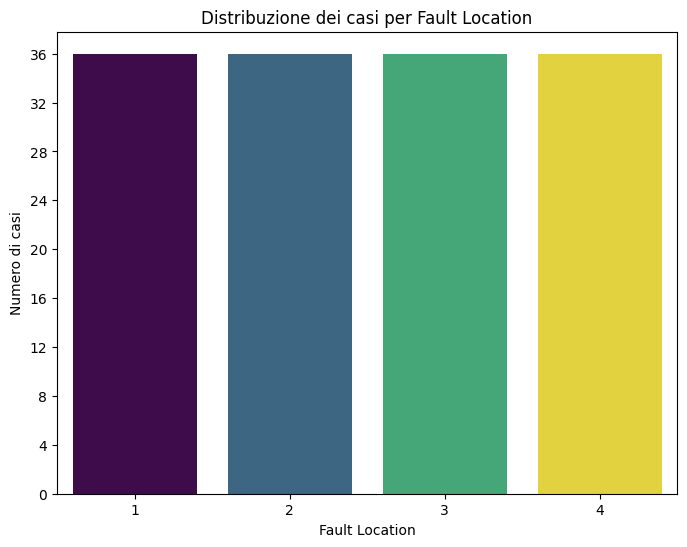

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(8,6))
ax = sns.countplot(x='fault_location', data=df_train_aggregated, hue='fault_location', palette='viridis', dodge=False)
ax.legend_.remove()  # Rimuove la legenda perché hue è uguale a x
plt.xlabel("Fault Location")
plt.ylabel("Numero di casi")
plt.title("Distribuzione dei casi per Fault Location")
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Assicura tick interi sull'asse y
plt.show()

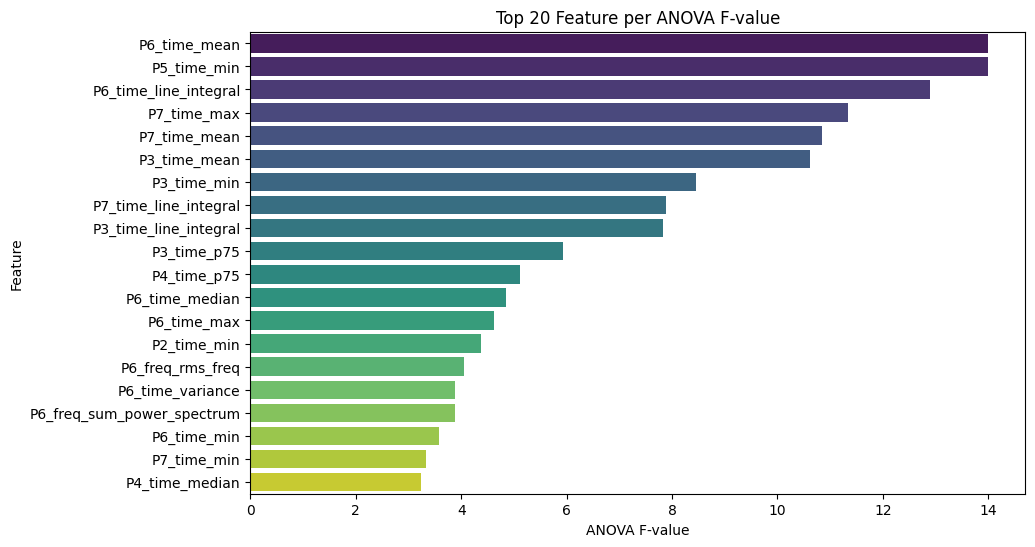

In [118]:
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest

# Separazione delle feature dal target
X = df_train_aggregated.drop(columns=['Spacecraft','BP1','BP2','BP3','BP4','BP5','BP6', 
                                      'BP7', 'BV1','SV1','SV2','SV3','SV4','fault_location', 'Condition', 'Case', "Window_ID"]) 
y = df_train_aggregated['fault_location']

# Calcolo gli F-value e i p-value per ogni feature
f_values, p_values = f_classif(X, y)

# Creo un DataFrame che riassume i risultati
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

top_10 = feature_scores.head(20)

# Feature con punteggio F-value più alto
plt.figure(figsize=(10, 6))
sns.barplot(x='F_value', y='Feature', data=top_10, hue='Feature', palette='viridis', dodge=False)
plt.xlabel("ANOVA F-value")
plt.ylabel("Feature")
plt.title("Top 20 Feature per ANOVA F-value")
plt.show()

Scegliamo le TOP N feature

In [119]:
selector = SelectKBest(score_func=f_classif, k=15) 
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print(selected_features)

Index(['P2_time_min', 'P3_time_mean', 'P3_time_p75', 'P3_time_line_integral',
       'P3_time_min', 'P4_time_p75', 'P5_time_min', 'P6_time_mean',
       'P6_time_median', 'P6_time_line_integral', 'P6_time_max',
       'P6_freq_rms_freq', 'P7_time_mean', 'P7_time_line_integral',
       'P7_time_max'],
      dtype='object')


### Addestro il classificatore tramite un Random Forest

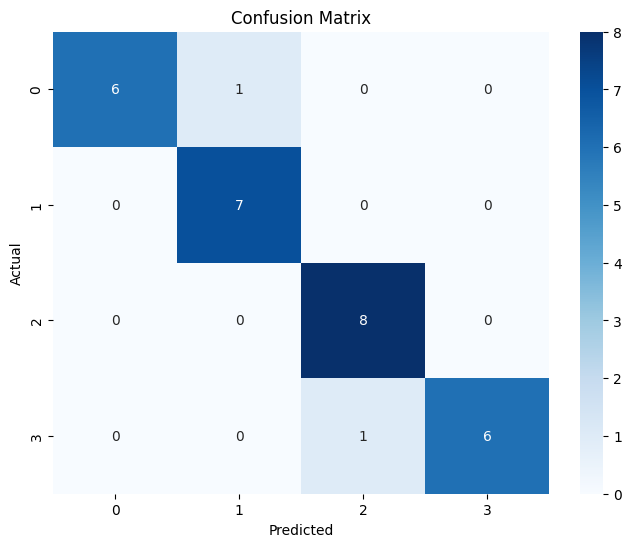

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7
           3       0.89      1.00      0.94         8
           4       1.00      0.86      0.92         7

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

Accuracy: 0.9310344827586207


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X = X[selected_features]

# 2. Suddivisione in training e test set (80% train, 20% test)
# Se la distribuzione delle classi in y è sbilanciata, puoi usare stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Addestramento del modello Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. Predizione sul test set
y_pred = rf_model.predict(X_test)

# 5. Calcolo e visualizzazione della matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. Stampa delle metriche di valutazione
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Salvo il modello di Random Forest

In [121]:
import pickle

with open("fault_locations.pkl", "wb") as f:
    pickle.dump(rf_model, f)


Facciamo le predizioni sul test set vero

In [122]:
path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "test_data_split_with_condition_and_anomaly_location.pkl")
test_data_aggregated_split= pd.read_pickle(file_path)

test_data_aggregated_split.head(5)

,Spacecraft,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,...,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,Condition,anomaly_location
0,1,1.984074,1.968528,1.897964,2.057444,0.089958,791.609870,0.599879,4.409431,1187.765081,...,4.957685,3639.567068,62.50000,25240.991187,404.252030,11.262289,178,1,2,2
1,1,1.984509,1.963438,1.898697,2.057745,0.090624,791.774258,0.561861,4.411653,1202.301221,...,4.959830,3945.055858,62.50000,23656.785685,391.929474,10.903133,178,2,2,2
2,1,1.984681,1.963766,1.899070,2.057667,0.090409,793.837928,0.561754,4.411926,1228.619720,...,4.960276,3979.709606,62.34414,23695.311811,390.011746,10.884694,178,3,2,2
3,1,1.984472,1.960340,1.892148,2.062852,0.093266,791.761654,0.479821,4.100935,1256.382067,...,5.082534,4950.370311,65.00000,27089.997640,499.897599,11.667504,179,1,3,0
4,1,1.985048,1.958879,1.894102,2.063106,0.093737,791.969210,0.453900,4.103057,1253.972941,...,5.085373,5538.603524,65.00000,25996.746576,504.627198,11.429651,179,2,3,0


In [123]:
# Filtra solo le righe in cui Condition è 2 (Anomaly)
df_test_split = test_data_aggregated_split[test_data_aggregated_split['Condition'] == 3].copy()

In [124]:
# Predizioni riga per riga usando solo le feature selezionate
X_test_pred = df_test_split[selected_features]
y_pred_rows = rf_model.predict(X_test_pred) 

In [125]:
# Aggiungiamo la colonna "anomaly_location" al DataFrame
df_test_split = df_test_split.copy()  # per evitare SettingWithCopyWarning
df_test_split.loc[:, 'fault_location'] = y_pred_rows

In [126]:
# Majority Voting per ottenere una predizione univoca per ogni Case e messo in un nuovo df
df_case_predictions = df_test_split.groupby("Case")["fault_location"] \
    .agg(lambda x: x.value_counts().idxmax()).reset_index()

Unisco con il ground truth preso da answer_competition.csv

In [127]:
# Importo il file 
df_answer = pd.read_csv("../dataset/test/answer_competition.csv")

# Eseguo il merge tra df_case_predictions (predizioni) e df_answer (ground truth)
df_compare = pd.merge(df_case_predictions, df_answer[['ID', 'task4']], left_on='Case', right_on='ID', how='inner')
df_compare.rename(columns={'fault_location': 'Predicted', 'task4': 'Expected'}, inplace=True)
df_compare[['Case', 'Predicted', 'Expected']]

,Case,Predicted,Expected
0,179,2,2
1,181,4,4
2,188,1,1
3,190,3,3
4,202,3,3
5,212,2,2
6,214,3,4


Matrice di confusione

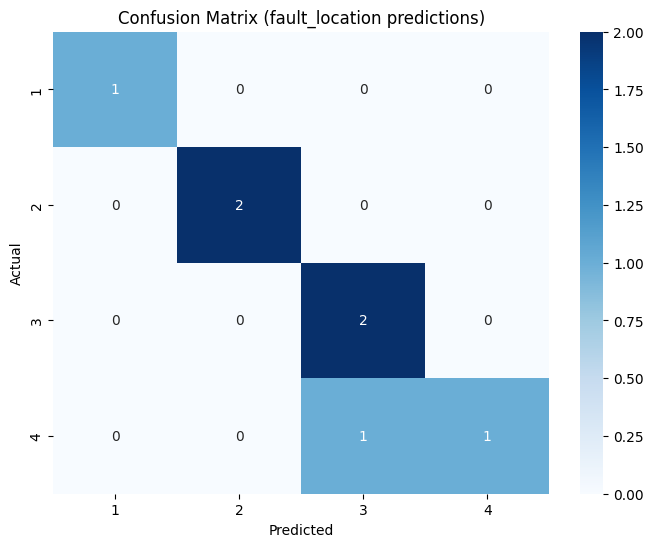

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.88      0.87         7
weighted avg       0.90      0.86      0.85         7

Accuracy: 0.8571428571428571


In [128]:

classes = sorted(df_compare["Expected"].unique())
cm = confusion_matrix(df_compare["Expected"], df_compare["Predicted"], labels=classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (fault_location predictions)")
plt.show()

print("Classification Report:")
print(classification_report(df_compare["Expected"], df_compare["Predicted"]))
print("Accuracy:", accuracy_score(df_compare["Expected"], df_compare["Predicted"]))

Uniamo i risultati ottenuti ai dati di test

In [130]:
# Eseguiamo il merge in modo che per ogni riga di df_test_aggregated_split venga aggiunta 
# la colonna "anomaly_locations" presa da df_case_predictions, basandoci sul campo "Case".
# Se un caso in df_test_aggregated_split non ha corrispondenza in df_case_predictions, il valore verrà NaN.
df_test_final = pd.merge(test_data_aggregated_split, 
                         df_case_predictions[['Case', 'fault_location']], 
                         on='Case', 
                         how='left')

df_test_final['fault_location'] = df_test_final['fault_location'].fillna(0).astype(int)
df_test_final.head(5)

,Spacecraft,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,...,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,Condition,anomaly_location,fault_location
0,1,1.984074,1.968528,1.897964,2.057444,0.089958,791.609870,0.599879,4.409431,1187.765081,...,3639.567068,62.50000,25240.991187,404.252030,11.262289,178,1,2,2,0
1,1,1.984509,1.963438,1.898697,2.057745,0.090624,791.774258,0.561861,4.411653,1202.301221,...,3945.055858,62.50000,23656.785685,391.929474,10.903133,178,2,2,2,0
2,1,1.984681,1.963766,1.899070,2.057667,0.090409,793.837928,0.561754,4.411926,1228.619720,...,3979.709606,62.34414,23695.311811,390.011746,10.884694,178,3,2,2,0
3,1,1.984472,1.960340,1.892148,2.062852,0.093266,791.761654,0.479821,4.100935,1256.382067,...,4950.370311,65.00000,27089.997640,499.897599,11.667504,179,1,3,0,2
4,1,1.985048,1.958879,1.894102,2.063106,0.093737,791.969210,0.453900,4.103057,1253.972941,...,5538.603524,65.00000,25996.746576,504.627198,11.429651,179,2,3,0,2


In [131]:
# Esporta il DataFrame finale in CSV e Pickle
df_test_final.to_csv('../dataset/dataframes/test_data_split_with_condition_and_anomaly_fault_location.csv', index=False)
df_test_final.to_pickle('../dataset/dataframes/test_data_split_with_condition_and_anomaly_fault_location.pkl')